In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime 
from datetime import datetime,timedelta

plt.style.use('seaborn')

# Importing 2020 dataframe from previous script
%store -r temp_2020_df

In [2]:
temp_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 8763 to 10226
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Time                   1460 non-null   datetime64[ns]
 1   Temp_river             1460 non-null   float64       
 2   Temp_air               1460 non-null   float64       
 3   Temp_SMA               1460 non-null   float64       
 4   Temp_network           1460 non-null   float64       
 5   COP_BIHP               1460 non-null   float64       
 6   HDD                    1460 non-null   float64       
 7   Space_Heating_Demand   1460 non-null   float64       
 8   BIHP_Demand            1460 non-null   float64       
 9   Total_Domestic_Demand  1460 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 125.5 KB


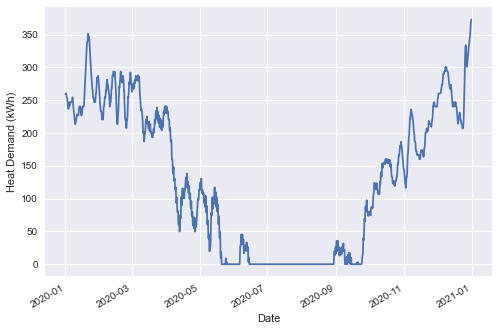

In [3]:
# Heating Demand for all except restaurants, schools and office centre 
Heat_demand_1 = np.zeros((len(temp_2020_df['Time']),1))
Total_HDD = sum(temp_2020_df['HDD'])

nondom_heat = 187.2 * 1000      # value calculated in notebook in kWh 

Heat_demand_1 = (temp_2020_df['HDD'] / Total_HDD) * nondom_heat    # in kWh for 6 hour slots 

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Heat_demand_1)
plt.xlabel('Date')
plt.ylabel('Heat Demand (kWh)')
fig.autofmt_xdate()

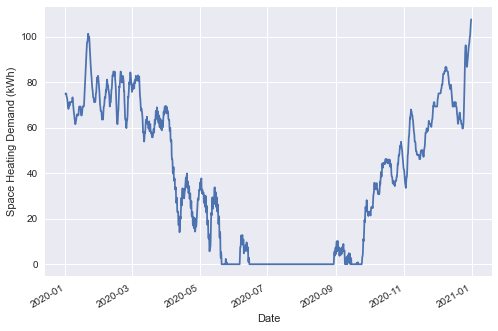

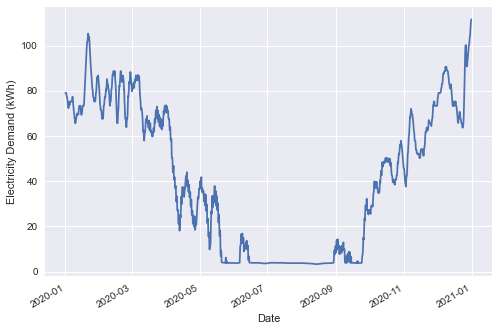

In [4]:
# Electricity Demand
demand_1 = Heat_demand_1 / temp_2020_df['COP_BIHP']

fig = plt.figure()
plt.plot(temp_2020_df['Time'], demand_1)
plt.xlabel('Date')
plt.ylabel('Space Heating Demand (kWh)')
fig.autofmt_xdate()


# Adding Hot Water demand 
DHW_heating = 20.8 * 1000                   # DHW heat demand from notebook
DHW_total = DHW_heating / temp_2020_df['COP_BIHP']
DHW_local = DHW_total / len(demand_1)

BIHP_demand_1 = demand_1 + DHW_local

fig = plt.figure()
plt.plot(temp_2020_df['Time'], BIHP_demand_1)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

In [5]:
BIHP_annual_demand_1 = BIHP_demand_1.sum()
print(BIHP_annual_demand_1)

59741.41384737521


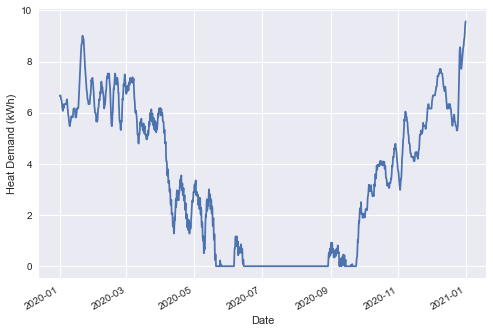

In [6]:
# Heating demand for restaurants 
Heat_demand_2 = np.zeros((len(temp_2020_df['Time']),1))

restaurant_heat = 4.8 * 1000      # value calculated in notebook 

Heat_demand_2 = (temp_2020_df['HDD'] / Total_HDD) * restaurant_heat    # in kWh for 6 hour slots 

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Heat_demand_2)
plt.xlabel('Date')
plt.ylabel('Heat Demand (kWh)')
fig.autofmt_xdate()

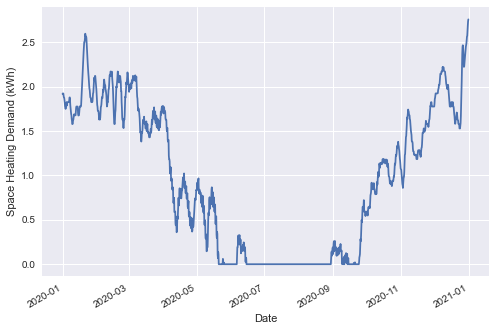

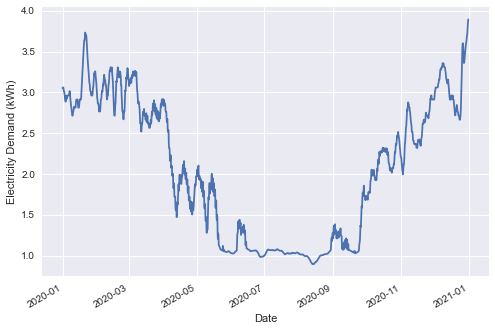

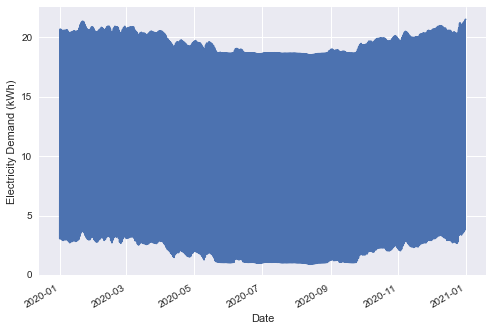

In [7]:
# Electricity Demand
demand_2 = Heat_demand_2 / temp_2020_df['COP_BIHP']

fig = plt.figure()
plt.plot(temp_2020_df['Time'], demand_2)
plt.xlabel('Date')
plt.ylabel('Space Heating Demand (kWh)')
fig.autofmt_xdate()


# Adding Hot Water demand 
DHW_heating = 5.76 * 1000                   # DHW heat demand from notebook
DHW_total = DHW_heating / temp_2020_df['COP_BIHP']
DHW_local = DHW_total / len(demand_2)

BIHP_demand_2 = demand_2 + DHW_local

fig = plt.figure()
plt.plot(temp_2020_df['Time'], BIHP_demand_2)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()


# Adding cooking demand 
Cooking_total = 19.296 * 1000
Cooking_local = (4/3) * (Cooking_total / len(BIHP_demand_2))

Total_restaurant_demand = BIHP_demand_2 + Cooking_local #added to all elements, but need to remove from every 4th element 
Total_restaurant_demand[0::4] = [x - Cooking_local for x in Total_restaurant_demand[0::4]]

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Total_restaurant_demand)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()
# graph looks silly because every 4th point is a lot lower than other 3



In [8]:
restaurant_annual_demand = Total_restaurant_demand.sum()
print(restaurant_annual_demand)

22290.530331982154


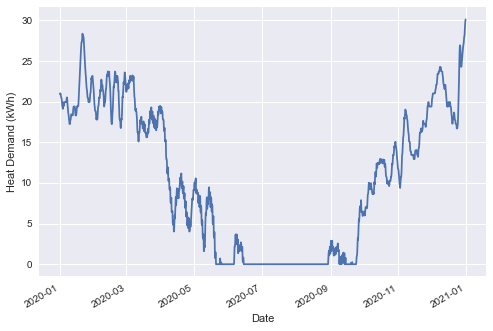

In [9]:
# Heating demand for offices 
Heat_demand_3 = np.zeros((len(temp_2020_df['Time']),1))

office_heat = 15.1 * 1000      # value calculated in notebook 

Heat_demand_3 = (temp_2020_df['HDD'] / Total_HDD) * office_heat    # in kWh for 6 hour slots 

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Heat_demand_3)
plt.xlabel('Date')
plt.ylabel('Heat Demand (kWh)')
fig.autofmt_xdate()


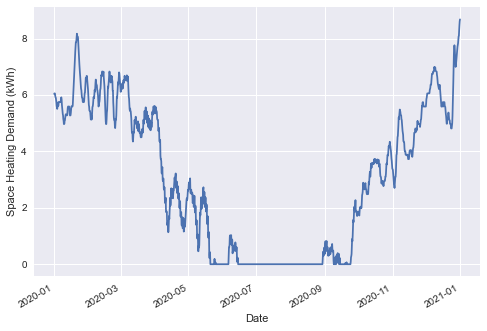

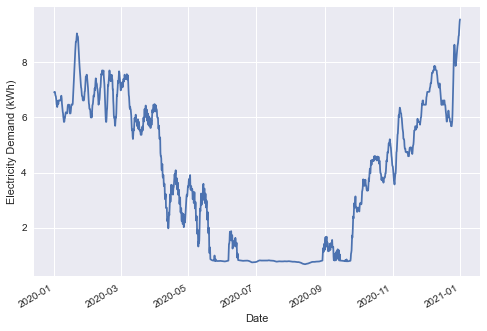

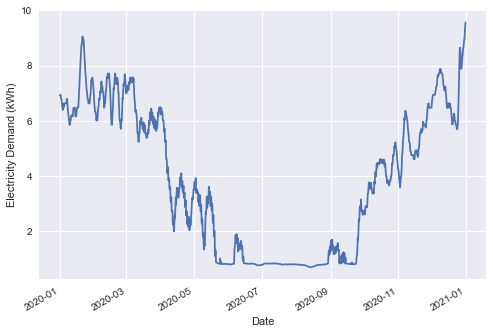

In [10]:
# Electricity Demand
demand_3 = Heat_demand_3 / temp_2020_df['COP_BIHP']

fig = plt.figure()
plt.plot(temp_2020_df['Time'], demand_3)
plt.xlabel('Date')
plt.ylabel('Space Heating Demand (kWh)')
fig.autofmt_xdate()


# Adding Hot Water demand 
DHW_heating = 4.4 * 1000                   # DHW heat demand from notebook
DHW_total = DHW_heating / temp_2020_df['COP_BIHP']
DHW_local = DHW_total / len(demand_3)

BIHP_demand_3 = demand_3 + DHW_local

fig = plt.figure()
plt.plot(temp_2020_df['Time'], BIHP_demand_3)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()


# Adding cooking demand 
Cooking_total = 0.025 * 1000
Cooking_local = Cooking_total / len(BIHP_demand_3)

office_demand = BIHP_demand_3 + Cooking_local  

fig = plt.figure()
plt.plot(temp_2020_df['Time'], office_demand)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

In [11]:
# sizing BIHP for offices  
COP_BIHP = np.array(temp_2020_df['COP_BIHP']).T

office_max_demand = office_demand.max()     # finding max electrical 
max_index = np.argmax(office_demand)
print(office_max_demand)

BIHP_max = 10    #rounding up for safety 
COP_max_demand = COP_BIHP[max_index]

BIHP_Qc = (BIHP_max / 6) * (COP_max_demand - 1)
print(BIHP_Qc)

9.563491875768227
4.1171875


In [12]:
# Heating days for schools 

# Creating dataframe for school
d2 = {'Time': temp_2020_df['Time'], 'School_HDD': temp_2020_df['HDD']}
school_df = pd.DataFrame(data=d2)
school_df['Time'] = pd.to_datetime(school_df['Time'])
school_df['Time2'] = pd.to_datetime(school_df['Time'])

# school_df.reset_index(inplace = True, drop = True)

school_df = school_df.set_index(['Time2'])


In [13]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1460 entries, 2020-01-01 00:00:00 to 2020-12-31 18:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        1460 non-null   datetime64[ns]
 1   School_HDD  1460 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


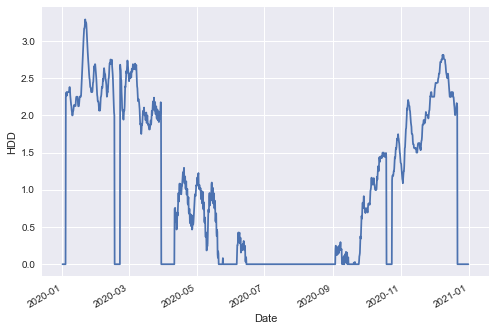

In [14]:
# Removing HDD during holidays 
school_df.loc['2020-01-01':'2020-01-03', 'School_HDD'] = 0
school_df.loc['2020-02-17':'2020-02-21', 'School_HDD'] = 0
school_df.loc['2020-03-30':'2020-04-10', 'School_HDD'] = 0
school_df.loc['2020-05-25':'2020-05-29', 'School_HDD'] = 0
school_df.loc['2020-07-22':'2020-09-02', 'School_HDD'] = 0
school_df.loc['2020-10-19':'2020-10-23', 'School_HDD'] = 0
school_df.loc['2020-12-22':'2020-12-31', 'School_HDD'] = 0

fig = plt.figure()
plt.plot(temp_2020_df['Time'], school_df['School_HDD'])
plt.xlabel('Date')
plt.ylabel('HDD')
fig.autofmt_xdate()

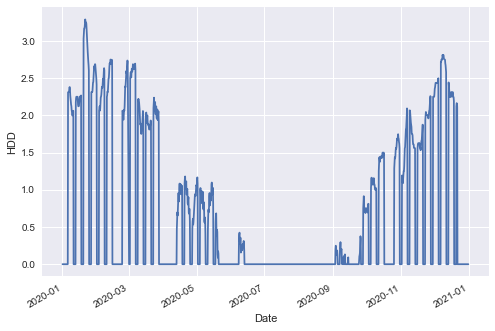

In [15]:
school_df['Days'] = school_df['Time'].dt.dayofweek

for i in range(len(school_df['School_HDD'])):
    if school_df.iloc[i]['Days'] > 4:
        school_df.loc[school_df.index[i],'School_HDD'] = 0

fig, ax = plt.subplots()
plt.plot(school_df['Time'], school_df['School_HDD'])
plt.xlabel('Date')
plt.ylabel('HDD')
fig.autofmt_xdate()


(array(18322.), array(18383.))

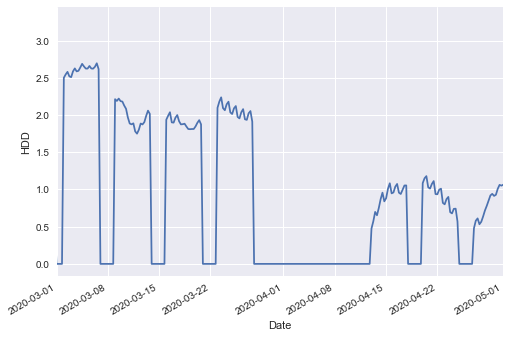

In [16]:
# plotting march - may so can see zeros better 
fig, ax = plt.subplots()
plt.plot(school_df['Time'], school_df['School_HDD'])
plt.xlabel('Date')
plt.ylabel('HDD')
fig.autofmt_xdate()
ax.set_xlim('2020-03-01', ('2020-05-01'))

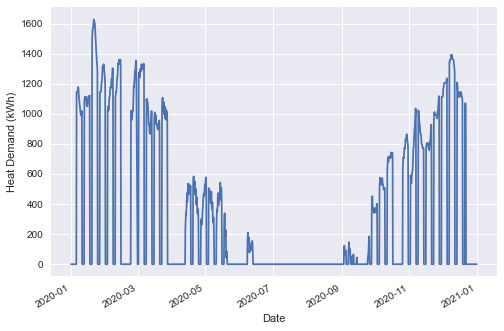

In [17]:
# Heating demand for schools
Heat_demand_3 = np.zeros((len(temp_2020_df['Time']),1))
Total_School_HDD = school_df['School_HDD'].sum()

school_heat = 498.904 * 1000      # value calculated in notebook 

Heat_demand_4 = (school_df['School_HDD'] / Total_School_HDD) * school_heat    # in kWh for 6 hour slots 
Heat_demand_4 = np.array(Heat_demand_4).T

fig = plt.figure()
plt.plot(school_df['Time'], Heat_demand_4)
plt.xlabel('Date')
plt.ylabel('Heat Demand (kWh)')
fig.autofmt_xdate()

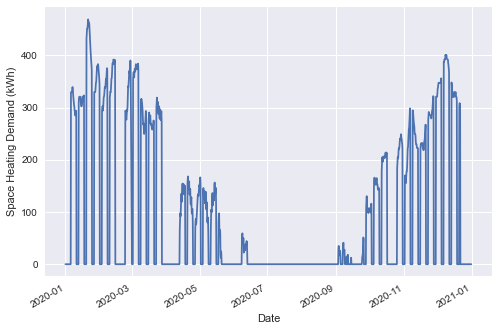

In [18]:
# Electricity Demand
demand_4 = Heat_demand_4 / temp_2020_df['COP_BIHP']

fig = plt.figure()
plt.plot(school_df['Time'], demand_4)
plt.xlabel('Date')
plt.ylabel('Space Heating Demand (kWh)')
fig.autofmt_xdate()


(array(18322.), array(18383.))

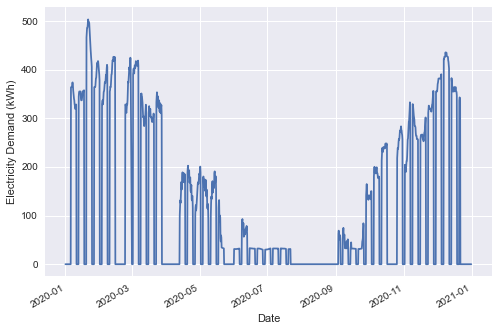

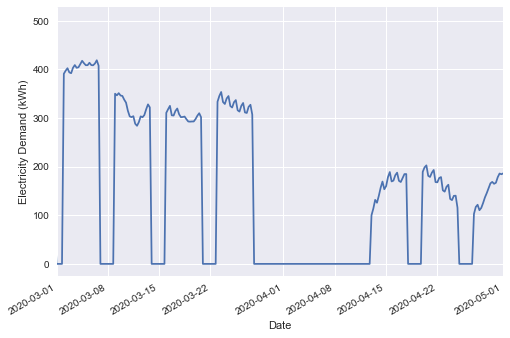

In [19]:
# Adding Hot Water demand 
DHW_heating = 145.376 * 1000                   # DHW heat demand from notebook
DHW_total = DHW_heating / temp_2020_df['COP_BIHP']
DHW_local = (DHW_total / len(demand_4)) * 1.2

BIHP_demand_4 = demand_4 + DHW_local

# Adding cooking demand 
Cooking_total = 0.025 * 1000
Cooking_local = (Cooking_total / len(BIHP_demand_4)) * 1.2

school_demand = BIHP_demand_4 + Cooking_local  
school_demand = np.array(school_demand).T
school_df['School_demand'] = school_demand

# Reset holidays and weekends to 0 demand 
school_df.loc['2020-01-01':'2020-01-03', 'School_demand'] = 0
school_df.loc['2020-02-17':'2020-02-21', 'School_demand'] = 0
school_df.loc['2020-03-30':'2020-04-10', 'School_demand'] = 0
school_df.loc['2020-05-25':'2020-05-29', 'School_demand'] = 0
school_df.loc['2020-07-22':'2020-09-02', 'School_demand'] = 0
school_df.loc['2020-10-19':'2020-10-23', 'School_demand'] = 0
school_df.loc['2020-12-22':'2020-12-31', 'School_demand'] = 0

for i in range(len(school_df['School_demand'])):
    if school_df.iloc[i]['Days'] > 4:
        school_df.loc[school_df.index[i],'School_demand'] = 0

school_demand = np.array(school_demand).T

fig = plt.figure()
plt.plot(school_df['Time'], school_df['School_demand'])
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

fig, ax = plt.subplots()
plt.plot(school_df['Time'], school_df['School_demand'])
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()
ax.set_xlim('2020-03-01', ('2020-05-01'))


In [20]:
# sizing BIHP for a school 
school_max_demand = (school_demand.max())/4     # finding max electrical demand
max_index = np.argmax(school_demand)
print(school_max_demand)

BIHP_max = 130   #rounding up for safety 
COP_max_demand = COP_BIHP[max_index]

BIHP_Qc = (BIHP_max / 6) * (COP_max_demand - 1)
print(BIHP_Qc)

125.86477652663316
53.5234375


(array(18322.), array(18383.))

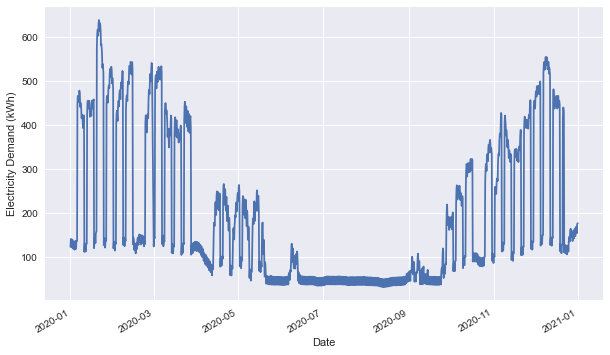

In [21]:
# Adding all the non domestic demands together 
Demand_nondom = BIHP_demand_1 + Total_restaurant_demand + office_demand + school_demand
temp_2020_df['Nondom_demand'] = Demand_nondom

fig = plt.figure(figsize=(10, 6))
plt.plot(temp_2020_df['Time'], temp_2020_df['Nondom_demand'])
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()
ax.set_xlim('2020-03-01', ('2020-05-01'))

In [22]:
Nondom_annual_demand = Demand_nondom.sum()
print(Nondom_annual_demand)

280208.65145166137


In [23]:
# converting to 30 min data 
year = '2020'
dti = pd.date_range(year + '-01-01', periods=17520, freq="0.5H")
 
Nondom_30_demand = np.zeros(17520)
 
for i in range(len(temp_2020_df['Time'])):
  amount = temp_2020_df.iloc[i]['Nondom_demand']/ 12
  small_array = amount * np.ones(12)
  Nondom_30_demand[i*12 : (i + 1)*12] = small_array


In [24]:
# converting to data to csv 
d = {'Time': dti, 'Non-Domestic Demand': Nondom_30_demand}
domestic_df = pd.DataFrame(data=d)

domestic_df.to_csv('nondomestic_demand.csv')

In [29]:
# Finding max total heat demand  
BIHP_total_max_demand = BIHP_demand_4.max()     # finding max electrical 
max_index = np.argmax(BIHP_demand_4)
print(BIHP_total_max_demand)

BIHP_max = 500    
COP_max_demand = COP_BIHP[max_index]

Nondom_BIHP_Qc = (BIHP_max / 6) * (COP_max_demand - 1)
print(Nondom_BIHP_Qc)

503.4385581613272
205.85937499999997
